# Adidas Sales Dataset Analysis

This notebook analyses the sales data of Adidas, focusing on uncovering trends of what drives the most sales and profit for Adidas.

## Executive Summary

Key findings include:
- Online sales take up the most sales but have a lower operating profit compared to outlet and in-store sales.
- Certain regions outperform others with South East, North East and West driving sales volume higher.
- Men's footwear, especially street footwear dominates sales out of the product categories with apparel being the lowest performing product.
- Date of sales show that sales peak in the summer months, mostly August, and also a smaller peak during Christmas time. Showing the seasonality of products.
- Machine Learning models shows that price per unit, sales method and product type are the strongest contributors to the accuracy of predicting units sold, with Random Forest achieving the best score of R^2 being about 69%.

## Exploratory Analysis

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")
print(df.head())


   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [48]:
print(df.tail())

      Unnamed: 0   Unnamed: 1 Unnamed: 2           Unnamed: 3 Unnamed: 4  \
9647         NaN  Foot Locker    1185732  2021-01-24 00:00:00  Northeast   
9648         NaN  Foot Locker    1185732  2021-01-24 00:00:00  Northeast   
9649         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   
9650         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   
9651         NaN  Foot Locker    1185732  2021-02-22 00:00:00  Northeast   

         Unnamed: 5  Unnamed: 6               Unnamed: 7 Unnamed: 8  \
9647  New Hampshire  Manchester            Men's Apparel         50   
9648  New Hampshire  Manchester          Women's Apparel         41   
9649  New Hampshire  Manchester    Men's Street Footwear         41   
9650  New Hampshire  Manchester  Men's Athletic Footwear         42   
9651  New Hampshire  Manchester  Women's Street Footwear         29   

     Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  
9647         64        3200       896.0        0.2

In [49]:
print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9652, 14) 

Columns:
 Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-n

## Cleaning the Data

In [50]:
df_raw = pd.read_excel("data/raw/Adidas US Sales Datasets.xlsx")

df = df_raw.drop(index=[0,1,2]).reset_index(drop=True)

df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df = df.drop(df.columns[0], axis=1)

print('Shape:\n', df.shape, '\n')
print('Columns:\n', df.columns, '\n')
print('Info:\n', df.info(), '\n')
print('Describe:\n', df.describe(), '\n')
print('Nulls:\n', df.isna().sum(), '\n')
print('Duplicates:\n', df.duplicated().sum(), '\n')

Shape:
 (9648, 13) 

Columns:
 Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  964

/var/folders/h9/78d8y54s1094rhy0vxgr6w400000gn/T/ipykernel_47451/3635571694.py:12: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  print('Describe:\n', df.describe(), '\n')


In [51]:
#Converting appropriate columns to numeric type
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

#Converting invoice date to datetime type
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

#Saving the cleaned dataset to data/interim
df.to_excel("data/interim/adidas_sales_cleaned.xlsx", index=False)

df['Retailer'].value_counts()


Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [52]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

## Data Visualisation

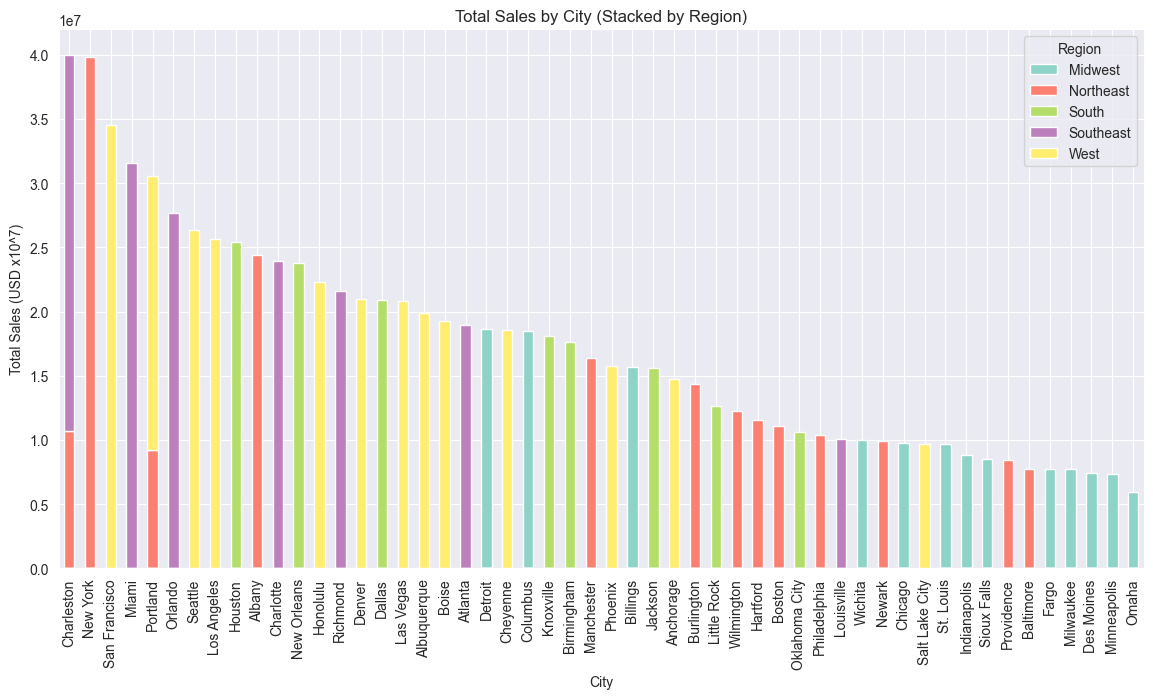

In [53]:
# Stacking bars ontop of each other to see the proportion of sales by region which is indicated by the colours in the legend
stacked = df.groupby(["City", "Region"])["Total Sales"].sum().unstack(fill_value=0)

# Order cities by total sales by adding up each of the cities' region's sales
stacked = stacked.loc[stacked.sum(axis=1).sort_values(ascending=False).index]

stacked.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="Set3"
)

plt.xticks(rotation=90)
plt.xlabel("City")
plt.ylabel("Total Sales (USD x10^7)")
plt.title("Total Sales by City (Stacked by Region)")
plt.legend(title="Region")
plt.show()

The top 3 cities with highest sales are Charleston, New York and San Francisco. The bar chart suggests the regions with the most sales is in the South East, North East and West while the region with least sales is the Midwest.

In [54]:
city_product_sales = df.groupby(['City', 'Product'])['Units Sold'].sum().reset_index()
most_sold_product_per_city = city_product_sales.sort_values(['Units Sold'], ascending=[False]).reset_index()
top_products = most_sold_product_per_city.groupby('Units Sold').head()
print(top_products)

     index         City                    Product  Units Sold
0       62   Charleston      Men's Street Footwear       23819
1      212     New York      Men's Street Footwear       22707
2      213     New York            Women's Apparel       19472
3      211     New York    Men's Athletic Footwear       18581
4      254     Portland      Men's Street Footwear       18185
..     ...          ...                        ...         ...
307     24    Baltimore              Men's Apparel        1951
308    198  Minneapolis              Men's Apparel        1912
309    232        Omaha  Women's Athletic Footwear        1761
310     28    Baltimore  Women's Athletic Footwear        1725
311    228        Omaha              Men's Apparel        1455

[312 rows x 4 columns]


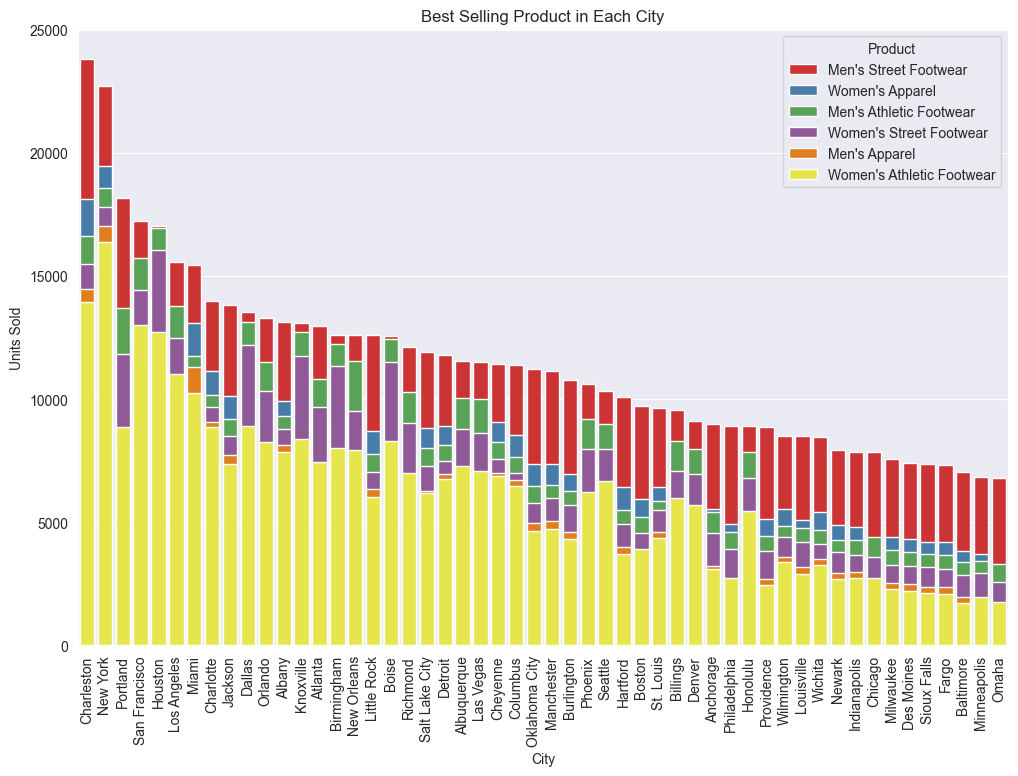

In [55]:
#Sort by most units sold
top_products = top_products.sort_values( "Units Sold", ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_products,
    x='City',
    y='Units Sold',
    hue='Product',
    dodge=False,   # make one bar per city coloured by product (stacked but still showing its real value along the y-axis)
    palette="Set1"
)
plt.xticks(rotation=90)
plt.title("Best Selling Product in Each City")
plt.ylabel("Units Sold")
plt.xlabel("City")
plt.legend(title="Product")
plt.show()

The most sold product across all cities is Men's Street Footwear and Women's Athletic Footwear being the least in-demand product. The preferences in each city allow for planning of adequate restocking of the more in-demand items to make sure that customers will be able to find the product they want, therefore increasing customer satisfaction and decreasing churn.

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64 

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64 



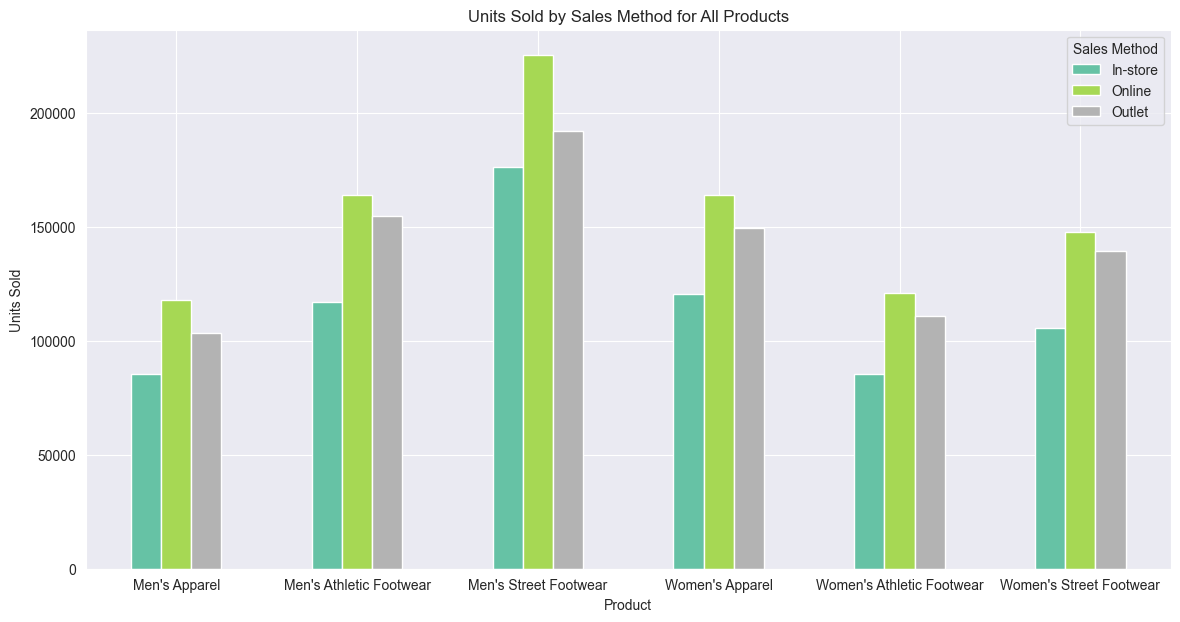

In [56]:
#Print how many times each sales method was used
sales_methods = df['Sales Method'].value_counts()
print(sales_methods, '\n')

#Print the number of items in each product category
all_products = df['Product'].value_counts()
print(all_products, '\n')

#Group products by sales method
sales_method_product = df.groupby(['Product', 'Sales Method'])['Units Sold'].sum().unstack(fill_value=0)

sales_method_product.plot(
    kind='bar',
    figsize=(14,7),
    colormap="Set2"
)

plt.title("Units Sold by Sales Method for All Products")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=360)
plt.legend(title="Sales Method")
plt.show()

The sales method used most is online shopping, therefore stocking the right products in warehouses based on the units sold will mean that customers will get faster shipping as the product is readily available and the customer will be more likely to purchase from Adidas again due to the greate service. The next most used sales method is in outlet stores which shows that customers may prefer lower priced items, therefore undercutting competitors' prices may increase sales of Adidas by attracting more customers, however that also leads to less profit.

                     Product  Operating Profit (Millions)
0      Men's Street Footwear                    82.802261
1            Women's Apparel                    68.650971
2    Men's Athletic Footwear                    51.846888
3    Women's Street Footwear                    45.095827
4              Men's Apparel                    44.763030
5  Women's Athletic Footwear                    38.975785 

                     Product  Operating Margin
0      Men's Street Footwear          0.446130
1            Women's Apparel          0.441318
2  Women's Athletic Footwear          0.424359
3              Men's Apparel          0.413225
4    Women's Street Footwear          0.410199
5    Men's Athletic Footwear          0.402702 



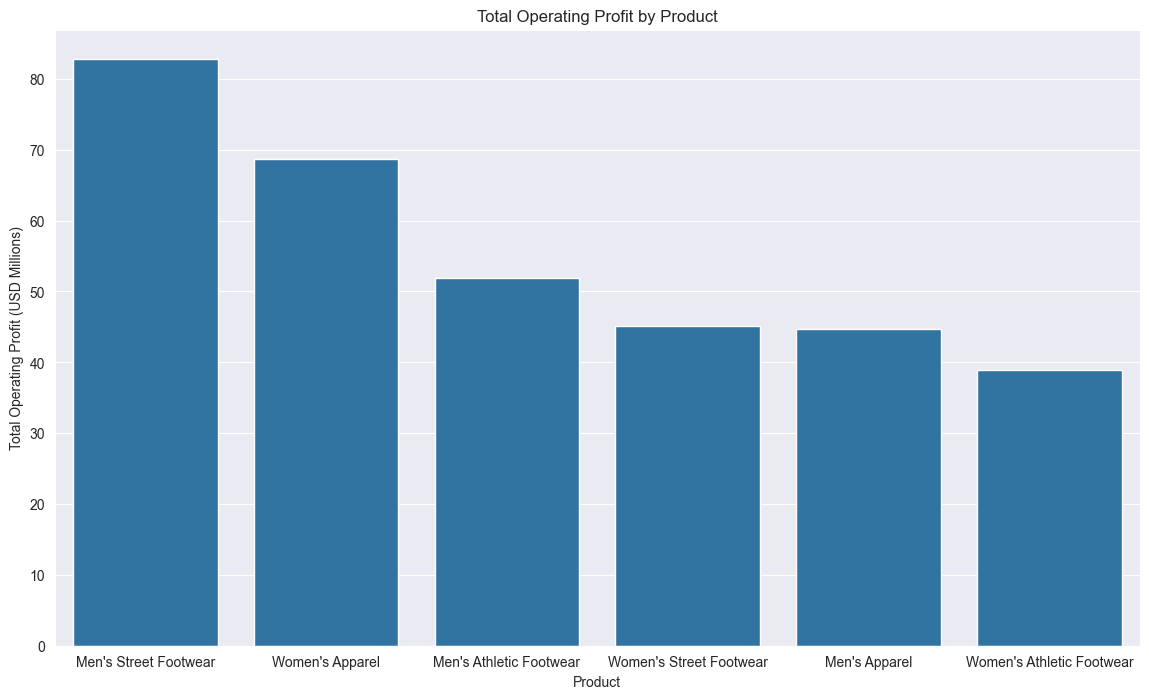

In [57]:
#Group by product to get total profit
profit_by_product = (df.groupby(["Product"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index())
profit_by_product["Operating Profit (Millions)"] = profit_by_product["Operating Profit"] / 1e6

print(profit_by_product[["Product", "Operating Profit (Millions)"]], "\n")

operating_margin_by_product =df.groupby("Product")["Operating Margin"].mean().reset_index().sort_values("Operating Margin", ascending=False).reset_index()
print(operating_margin_by_product[["Product", "Operating Margin"]], "\n")

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_product,
    x="Product",
    y="Operating Profit (Millions)",
    dodge=True
)

plt.title("Total Operating Profit by Product")
plt.ylabel("Total Operating Profit (USD Millions)")
plt.xlabel("Product")
plt.show()

Men's Street Footwear takes the lead with bringing the highest total operating profit which is from its high sales volume and having the highest average operating margin of about 44.6%. Therefore, men's street footwear not only has the highest amount of units sold but also the highest profit, so Adidas should focus on the sales of this product and keep developing it to keep attraction high.

  Sales Method  Operating Profit (Millions)
0     In-store                   127.591288
1       Outlet                   107.988297
2       Online                    96.555176 



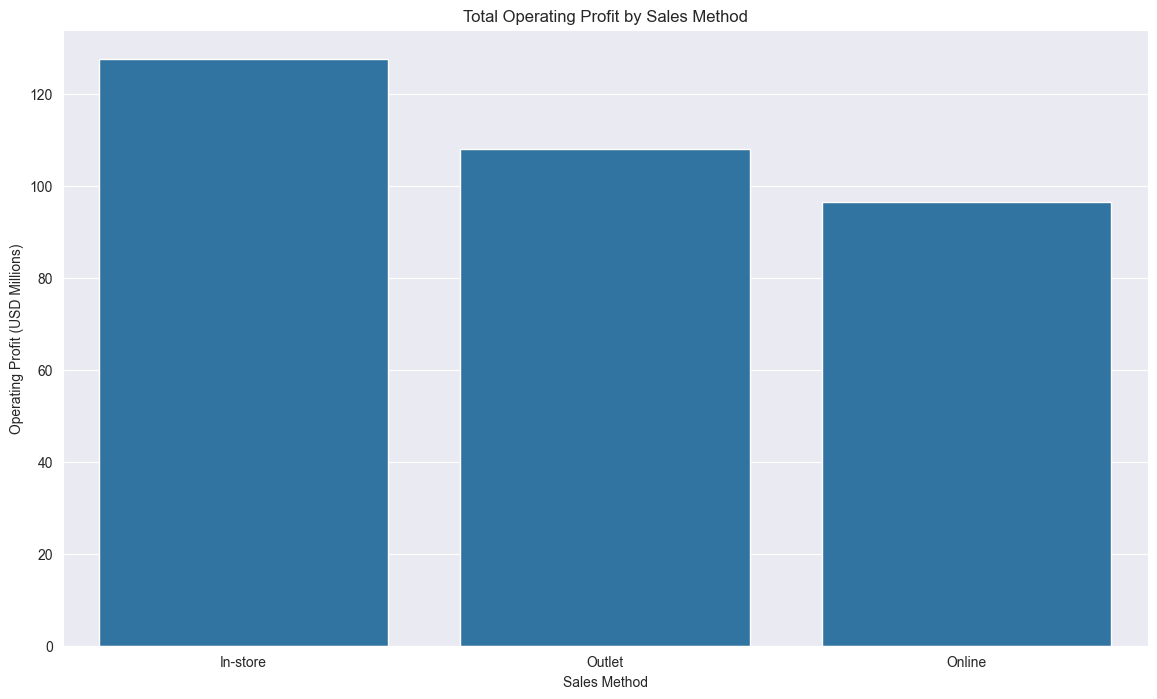

In [58]:
profit_by_method = (df.groupby(["Sales Method"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index())
profit_by_method["Operating Profit (Millions)"] = profit_by_method["Operating Profit"] / 1e6

print(profit_by_method[["Sales Method", "Operating Profit (Millions)"]], "\n")

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_method,
    x="Sales Method",
    y="Operating Profit (Millions)",
    dodge=True
)

plt.title("Total Operating Profit by Sales Method")
plt.ylabel("Operating Profit (USD Millions)")
plt.xlabel("Sales Method")
plt.show()

Even though in-store sales method was the least used, it has the highest operating profit. Whereas online sales had the highest sales volume but the graph shows that it has the lowest operating profit.

  Sales Method                  Product  Operating Profit (Millions)
0     In-store    Men's Street Footwear                    34.867100
1     In-store          Women's Apparel                    26.285125
2       Outlet    Men's Street Footwear                    24.977139
3       Online    Men's Street Footwear                    22.958022
4       Outlet          Women's Apparel                    21.522246
5       Online          Women's Apparel                    20.843599
6     In-store  Men's Athletic Footwear                    19.702375
7     In-store            Men's Apparel                    17.474500
8       Outlet  Women's Street Footwear                    16.690954
9       Outlet  Men's Athletic Footwear                    16.470335


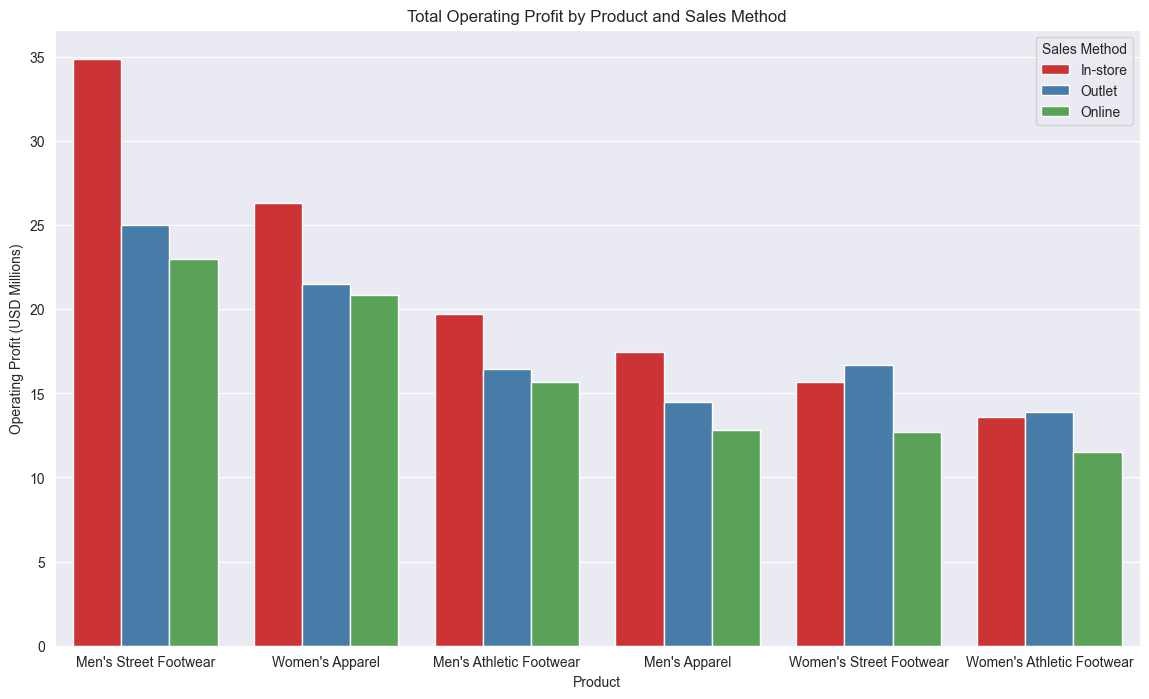

In [59]:
profit_by_product_and_method = df.groupby(["Sales Method", "Product"])["Operating Profit"].sum().reset_index().sort_values("Operating Profit", ascending=False).reset_index()
profit_by_product_and_method["Operating Profit (Millions)"] = profit_by_product_and_method["Operating Profit"] / 1e6

print(profit_by_product_and_method[["Sales Method","Product","Operating Profit (Millions)"]].head(10)) #top 10

plt.figure(figsize=(14,8))
sns.barplot(
    data=profit_by_product_and_method,
    x="Product",
    y="Operating Profit (Millions)",
    hue="Sales Method",
    palette="Set1",
    dodge=True
)

plt.title("Total Operating Profit by Product and Sales Method")
plt.ylabel("Operating Profit (USD Millions)")
plt.xlabel("Product")
plt.legend(title="Sales Method")
plt.show()

This graph explains why Men's Street Footwear had the highest operating margin as it shows that most of its sales were through in-store purchases which are the best sales method for high operating profit. Most of the products brought in the most profit from in-store purchases even though they were mainly bought online. Outlet stores have the lowest priced products but still are the second highest contributor to operating profit, and for Women's  Street and Athletic Footwear they are the highest contributor compared to the other sales methods.

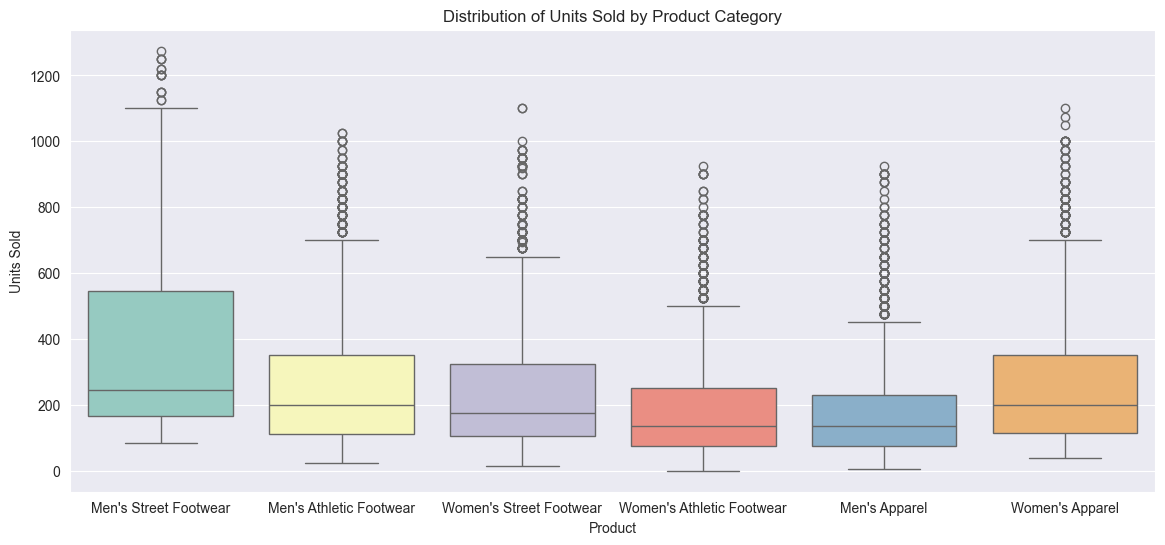

In [60]:
plt.figure(figsize=(14,6))
sns.boxplot(x="Product", y="Units Sold", data=df, hue="Product", palette="Set3")
plt.title("Distribution of Units Sold by Product Category")
plt.show()

Men's Street Footwear shows somewhat consistent sales with the fewest amount of outliers. Products like Men's Apparel have a much wider variety which shows the demand uncertainty for these products.

        Month  Units Sold
0     January      227632
1    February      193959
2       March      190960
3       April      216426
4         May      214605
5        June      181014
6        July      218700
7      August      257721
8   September      228550
9     October      183001
10   November      174502
11   December      191791 



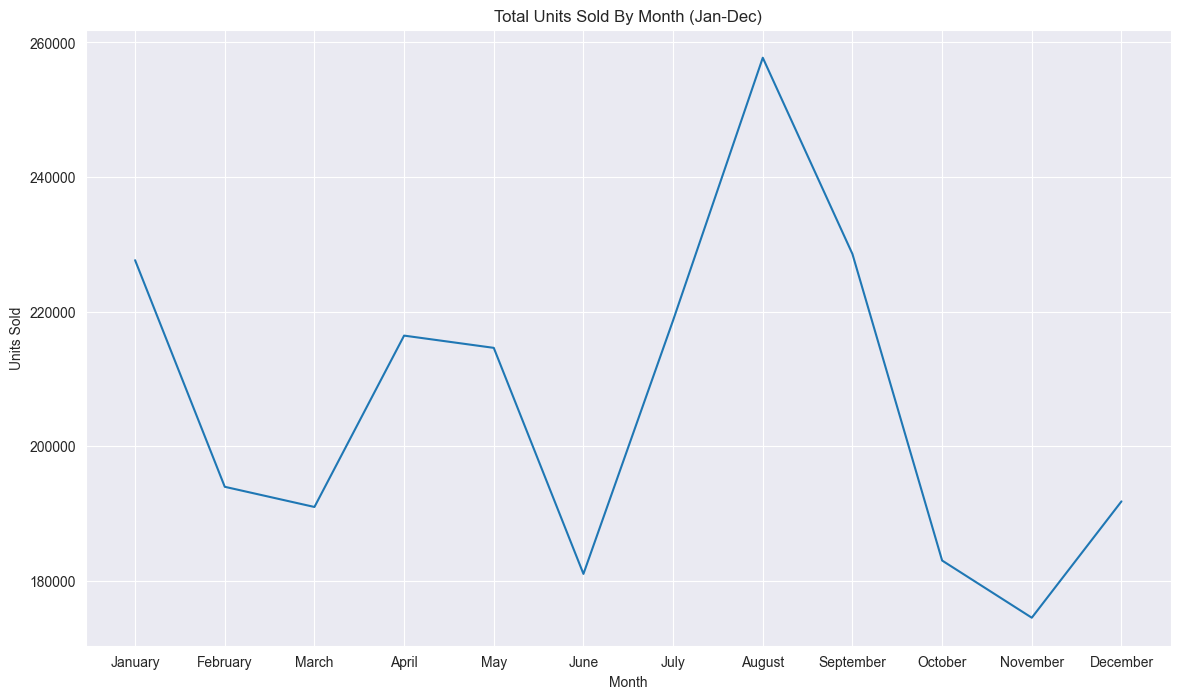

In [61]:
df["Month"] = df["Invoice Date"].dt.month_name()
df["Month Number"] = df["Invoice Date"].dt.month

#Sort by increasing month number but show the month name
sales_by_date = df.groupby(["Month Number", "Month"])["Units Sold"].sum().reset_index().sort_values("Month Number")

print(sales_by_date[["Month", "Units Sold"]], "\n")

plt.figure(figsize=(14,8))
sns.lineplot(
    data=sales_by_date,
    x="Month",
    y="Units Sold"
)

plt.title("Total Units Sold By Month (Jan-Dec)")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.show()

This line graph shows that sales peak mainly in the summer months from June to October. There is also a smaller peak in December and January which could represent customers shopping for Christmas presents. Adidas can predict sales and revenue income based on this graph and know to stock more products during the summer months to prepare for a huge increase in sales mainly in August.

        Month  Units Sold
0      August      257721
1   September      228550
2     January      227632
3        July      218700
4       April      216426
5         May      214605
6    February      193959
7    December      191791
8       March      190960
9     October      183001
10       June      181014
11   November      174502 



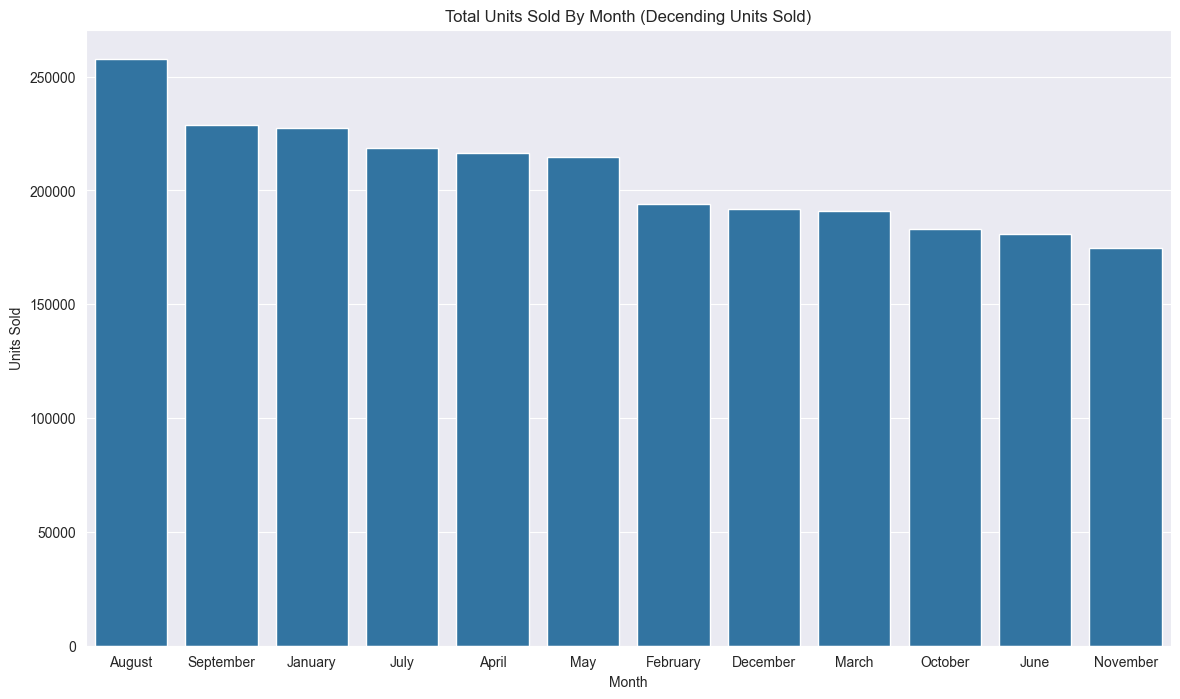

In [62]:

sales_by_date = df.groupby(["Month"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()

print(sales_by_date[["Month", "Units Sold"]], "\n")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=sales_by_date,
    x="Month",
    y="Units Sold"
)

plt.title("Total Units Sold By Month (Descending Units Sold)")
plt.ylabel("Units Sold")
plt.xlabel("Month")
plt.show()

   Price Range Label  Units Sold
0            $41–$51      680141
1            $51–$61      550990
2            $31–$41      495659
3            $61–$71      273944
4            $21–$31      238634
5            $71–$81       90605
6            $11–$21       83444
7            $81–$91       41288
8           $91–$101       13401
9          $101–$111        5944
10            $1–$11        4811 



/var/folders/h9/78d8y54s1094rhy0vxgr6w400000gn/T/ipykernel_47451/2338280880.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price = df.groupby(["Price Range Label"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()


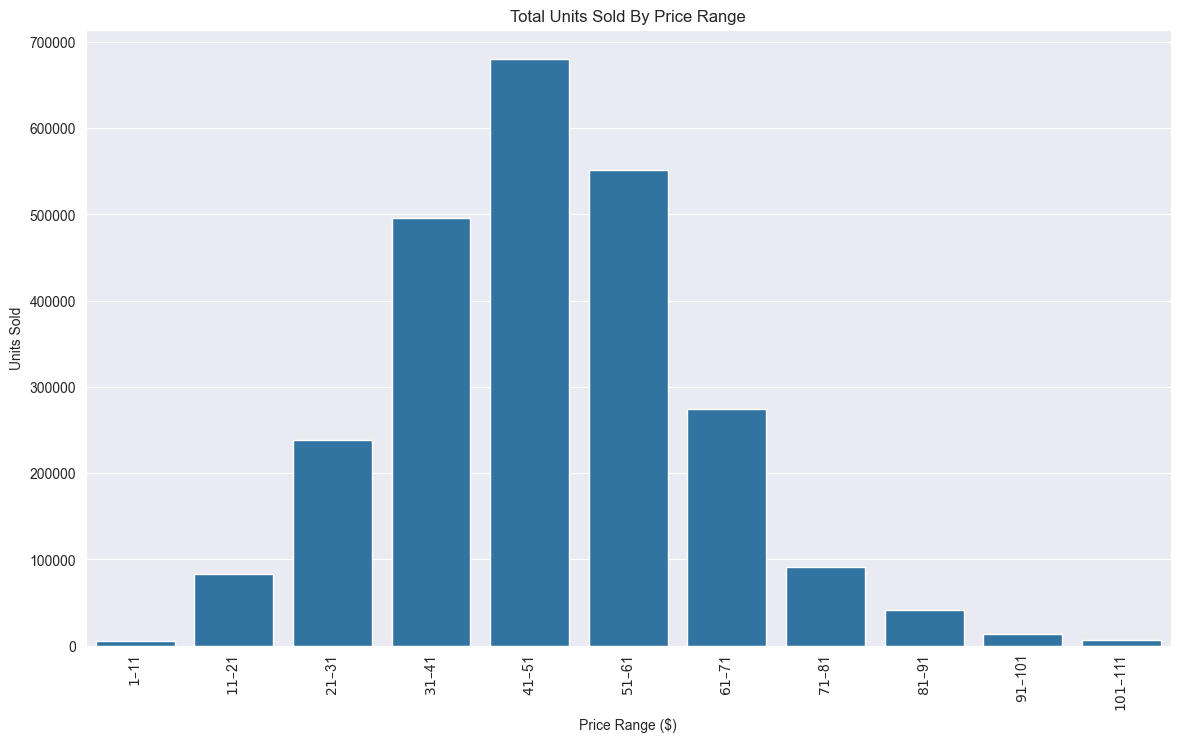

In [63]:
#Separate prices into 11 bins of price ranges
df["Price Range"] =pd.cut(df["Price per Unit"], bins=range(1,  int(df["Price per Unit"].max()) + 10, 10), right=False)
#Label the prices to show the actual range
df["Price Range Label"] = df["Price Range"].apply(lambda x: f"${int(x.left)}–${int(x.right)}")

sales_by_price = df.groupby(["Price Range Label"])["Units Sold"].sum().reset_index().sort_values("Units Sold", ascending=False).reset_index()
print(sales_by_price[["Price Range Label", "Units Sold"]], "\n")

plt.figure(figsize=(14, 8))
sns.barplot(
    data=sales_by_price,
    x="Price Range Label",
    y="Units Sold"
)

plt.title("Total Units Sold By Price Range")
plt.ylabel("Units Sold")
plt.xlabel("Price Range ($)")
plt.xticks(rotation=90)
plt.show()

The most sales were in the price range of $41-51 which shows that this would be the optimal price point for items.

## Predictive Modelling

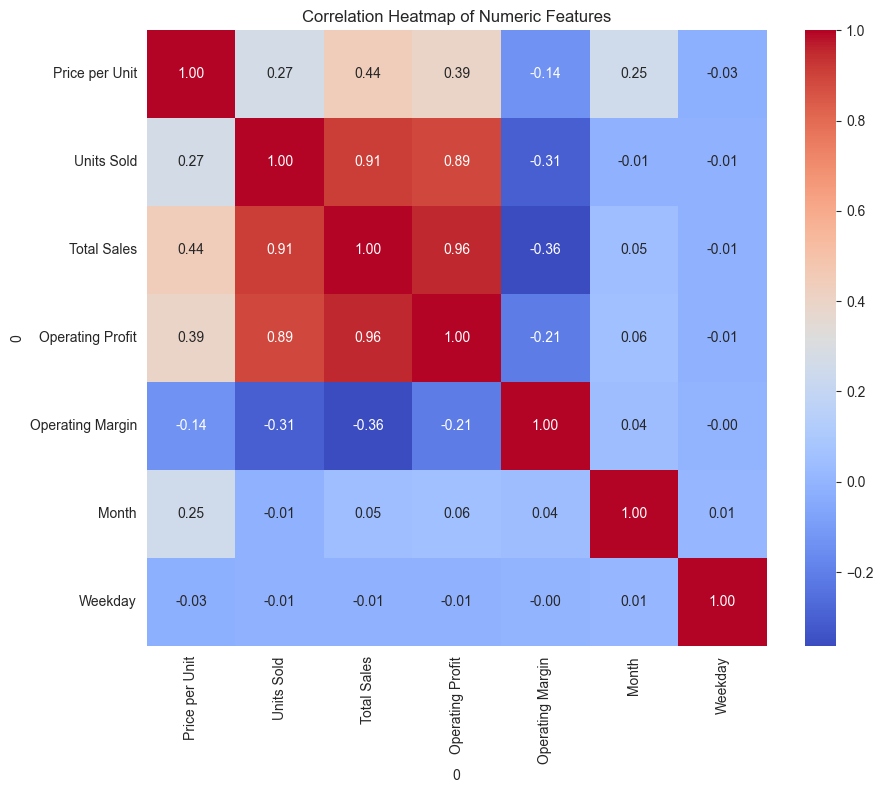

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Convert date into month and days of the week
df['Month'] = df['Invoice Date'].dt.month
df['Weekday'] = df['Invoice Date'].dt.weekday

#Select numeric columns
numeric_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Month', 'Weekday']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

The correlation between units sold and total sales and operating profit is a given. The moderate correlation between operating profit and price per unit shows that higher priced product tend to generate higher operating profit despite the number of sales.

In [65]:
features = ['Price per Unit', 'Month', 'Weekday', 'Region', 'Sales Method', 'Product']

#encodes non numerical values so the model can understand them
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['Units Sold']

#train model on 80% of the data and test on the other 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state for reproducibility

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)#lower is better
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) #closer to 1 means better prediction

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

#measure how much each feature reduces prediction error
importances = rf.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feat_importance_df)

MAE: 81.12190618677522
MSE: 14670.771105441723
R^2: 0.689182925014755
                              Feature  Importance
0                      Price per Unit    0.354145
1                               Month    0.143690
7                 Sales Method_Online    0.091082
2                             Weekday    0.086581
10      Product_Men's Street Footwear    0.070539
5                    Region_Southeast    0.049981
8                 Sales Method_Outlet    0.045118
4                        Region_South    0.031326
3                    Region_Northeast    0.030468
6                         Region_West    0.026003
9     Product_Men's Athletic Footwear    0.023586
11            Product_Women's Apparel    0.018443
13    Product_Women's Street Footwear    0.016631
12  Product_Women's Athletic Footwear    0.012408


Random Forest Regression
- Mean Absolute Error is off by 81 units sold but total units sold are in the hundred thousands so 81 is a small error compared to the total units sold
- Mean Squared Error is 14670 so RMSE is about 121 units sold which is also a small error compared to the larger scale of total units sold
- These would only affect the lower price range products but they have low amounts sold in any case
- R^2 explains about 69% of variance in units sold, which could be improved by unmeasured factors
- The top 3 most important features to predict units sold are the price of the product, the month of purchase (some items may be seasonal) and the method of purchasing items online

In [66]:
from sklearn.linear_model import LinearRegression

X = df_encoded
y = df['Units Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

#measure feature coefficients to see how much the target changes with a 1 unit change
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df)


MAE: 125.49549518057701
MSE: 30380.999141890643
R^2: 0.35634376539968704
                              Feature  Coefficient
7                 Sales Method_Online  -221.402577
10      Product_Men's Street Footwear   204.537262
8                 Sales Method_Outlet  -118.928041
9     Product_Men's Athletic Footwear   111.157970
4                        Region_South   100.613049
13    Product_Women's Street Footwear    95.392578
5                    Region_Southeast    91.847152
11            Product_Women's Apparel    67.749601
3                    Region_Northeast   -59.273854
12  Product_Women's Athletic Footwear    46.270973
6                         Region_West    13.008064
1                               Month    -6.254596
0                      Price per Unit     4.861590
2                             Weekday    -1.339005


Linear Regression
- Mean Absolute Error is showing the model's predictions are off by about 125 which is small enough compared to the larger scale that the total units sold shows.
- Mean Squared Error is about 30381 so the RMSE is about 174 which is still small enough compared to total units sold.
- R^2 only explains 36% of variance in the data which means it's underfitting the data.
- The feature coefficients show that more online sales decreases units sold, however increasing the purchase of men's street footwear increases units sold.

In [67]:
from sklearn.neural_network import MLPRegressor

features = ['Price per Unit', 'Month', 'Weekday', 'Region', 'Sales Method', 'Product']

df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['Units Sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural network regressor
nn = MLPRegressor(hidden_layer_sizes=(64, 32),  # two hidden layers
                  activation='relu',
                  solver='adam',
                  max_iter=1000,
                  random_state=42)

nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

MAE: 111.11086572089972
MSE: 24344.049897769488
R^2: 0.48424344377420203


Neural Network Regression
- MAE and MSE are low enough for them not to be an issue in predicting units sold
- However R^2 can only explain about 48% of variance in the data

## Conclusion

Through exploratory analysis and predictive modelling the results show insight into the main factors driving Adidas' sales.
- Most sales are made in the mid range with most sales from $30-60, so pricing within this range is likely to increase sales.
- Sales methods play an important part as online sales contribute significantly more than outlet and in-store sales.
- Men's footwear, specifically street footwear dominates the sales and profit whereas women's apparel doesn't perform as well and could be redesigned to attract more customers by following trends and performing market research.
- Inventory and marketing strategies could be based on regions and cities accordingly where Charleston and New York have high sales so would need to be restocked more frequently. Marketing could be focused on regions with lower sales such as in the Midwest.
- Tree based models such as Random Tree modelling provided a more accurate prediction on units sold compared to Linear Regression and Neural Network Regression. However, there are more factors that should be taken into account that could predict sales at a higher accuracy.